# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 2.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([-2., 3., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

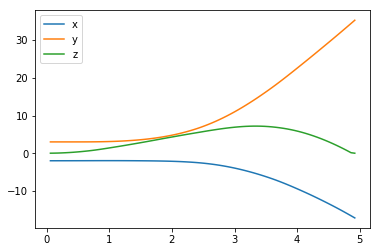

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

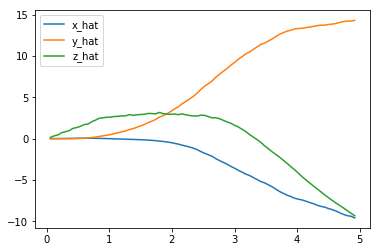

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

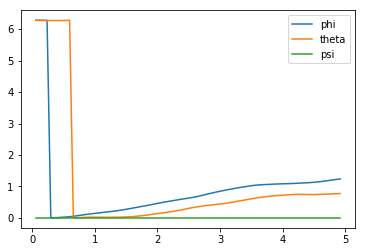

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

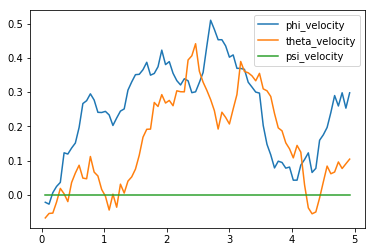

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

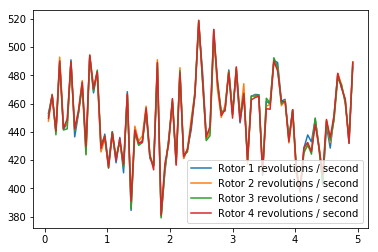

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [23]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 12.21790333  11.8304536   13.56015535   0.76398851   5.31948648   0.        ]
[ 11.46173145   7.49583855  -2.6558744 ]
[ 0.16590969 -0.19390532  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [13]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 100.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4','reward']
results_b = {x : [] for x in labels}
score_dynamics= {'episode':[], 'score':[]}
temp_score = []
score = 0
best_score = 0

for i_episode in range(1, num_episodes+1):
    score = 0
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        
        #add up reward for current episode
        score += reward
        
        save = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) \
               + list(action)+[reward] 
        for k in range(len(labels)):
            results_b[labels[k]].append(save[k])
            
        agent.step(reward, done)
        
        state = next_state
        if done:
            
            #store total reward for current episode
            temp_score.append(score) 
            
            #update best_score
            if score > best_score:
                best_score = score
                
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, score, best_score, agent.noise_scale), end="")  # [debug]
            score_dynamics['episode'].append(i_episode)
            score_dynamics['score'].append(np.mean(temp_score))
            break
    sys.stdout.flush()

Episode = 1000, score = -250.000 (best =  69.000), noise_scale = 3.25

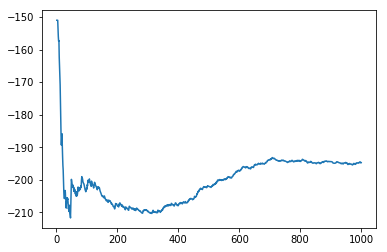

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(score_dynamics['episode'], score_dynamics['score'])
plt.show()

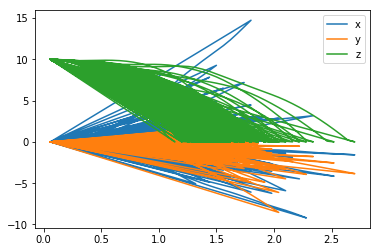

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results_b['time'], results_b['x'], label='x')
plt.plot(results_b['time'], results_b['y'], label='y')
plt.plot(results_b['time'], results_b['z'], label='z')
plt.legend()
_ = plt.ylim()

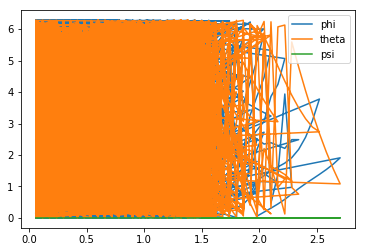

In [16]:
plt.plot(results_b['time'], results_b['phi'], label='phi')
plt.plot(results_b['time'], results_b['theta'], label='theta')
plt.plot(results_b['time'], results_b['psi'], label='psi')
plt.legend()
_ = plt.ylim()

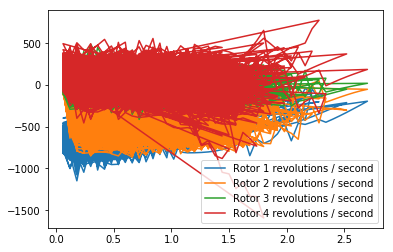

In [17]:
plt.plot(results_b['time'], results_b['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results_b['time'], results_b['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results_b['time'], results_b['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results_b['time'], results_b['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
## TODO: Train your agent here.
## agent training done using deep deterministic policy gradient (DDPG)
import sys
import csv
import time
import pandas as pd
import numpy as np
from agents.agent_modified import DDPG
from task import Task

t0 = time.time()
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4','reward']
results = {x : [] for x in labels}

num_episodes = 300 #start with one then move to 1000

#initialize quadcopter position and velocities
target_pos = np.array([0., 0., 50.])
init_pose = np.zeros(6)
init_velocities= np.zeros(3)
init_angle_velocities=np.zeros(3)

#call task and agent
task = Task(init_pose= init_pose,init_velocities = init_velocities, 
            init_angle_velocities=init_angle_velocities,target_pos=target_pos)
agent = DDPG(task) 

#initialize score keeper
score_dynamics= {'episode':[], 'score':[]}
temp_score = []
score = 0
best_score = 0

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    #print('state ', state, 'episode ', i_episode)
    if (i_episode % 30 == 0):
        print('this is episode ' ,i_episode, ';', time.time()-t0,' secods passed')
    
    # run till a terminal state is encoutered
    for time_t in range(90):
        
        #get action based on current state following current policy 
        action = agent.act(state) 
        #print('action ', action)
        
        
        
        #action-reaction: get new state and rewad 
        # in reaction to taken action
        next_state, reward, done = task.step(action)
        
        #add up reward for current episode
        score += reward
        
        # save episode  into the replay buffer
        # once enough episodes are stored in memory
        # minibatch is sampled and learning from these
        # takes place
        agent.step(action, reward, next_state, done)
        
        
        save = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) \
               + list(action)+[reward] 
        for k in range(len(labels)):
            results[labels[k]].append(save[k])
        
        state = next_state
        
        if done:
            
            #store total reward for current episode
            temp_score.append(score) 
            
            #update best_score
            if score > best_score:
                best_score = score
                
            # print the score and break out of the loop
            if i_episode % 10 ==0:
                print("episode: {}/{}, time: {}, score = {}, best score = {}"
                      .format(i_episode, num_episodes, time_t, score, best_score))
            score_dynamics['episode'].append(i_episode)
            score_dynamics['score'].append(np.mean(temp_score))
            break
                

Using TensorFlow backend.


reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward c

reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward c

reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
episode:

reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
this is episode  30 ; 47.30462121963501  secods passed
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
r

reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
this is episode  60 ; 52.63258099555969  secods passed
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
episode: 60/300, time: 2, score = -39, best score = 0
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip

reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
episode: 140/300, time: 1, score = -26, best score = 0
reward clip : 1
reward clip : 1
r

reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
episode: 220/300, time: 1, score = -26, best score = 0
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
r

reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
this is episode  300 ; 80.70984816551208  secods passed
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
reward clip : 1
episode: 300/300, time: 1, score = -26, best score = 0


In [2]:
L = len(results['time'])
L

1270

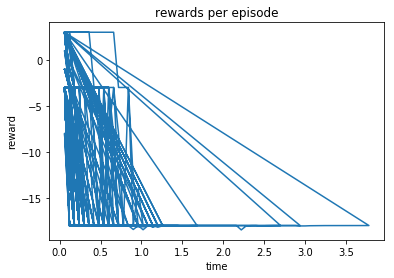

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

t1=int(0)
t2=int(L)
plt.plot(results['time'][t1:t2], results['reward'][t1:t2])
plt.title('rewards per episode')
plt.xlabel('time')
plt.ylabel('reward')
plt.show()

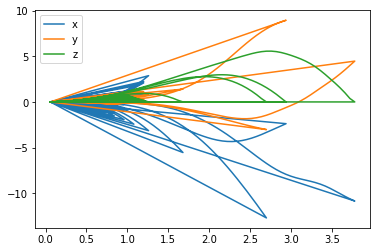

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

t1=int(L*0)
t2=int(L*1)
plt.plot(results['time'][t1:t2], results['x'][t1:t2], label='x')
plt.plot(results['time'][t1:t2], results['y'][t1:t2], label='y')
plt.plot(results['time'][t1:t2], results['z'][t1:t2], label='z')
plt.legend()
_ = plt.ylim()

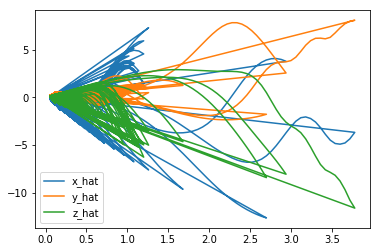

In [9]:
t1= 0
t2= int(L)

plt.plot(results['time'][t1:t2], results['x_velocity'][t1:t2], label='x_hat')
plt.plot(results['time'][t1:t2], results['y_velocity'][t1:t2], label='y_hat')
plt.plot(results['time'][t1:t2], results['z_velocity'][t1:t2], label='z_hat')
plt.legend()
_ = plt.ylim()

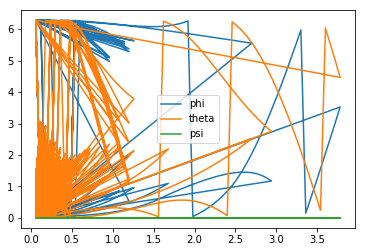

In [10]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

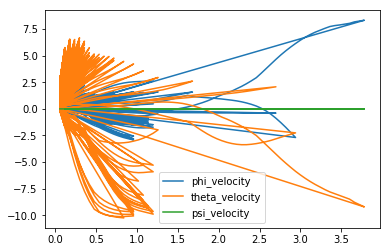

In [11]:
t1 = 0
t2 = int(L)
plt.plot(results['time'][t1:t2], results['phi_velocity'][t1:t2], label='phi_velocity')
plt.plot(results['time'][t1:t2], results['theta_velocity'][t1:t2], label='theta_velocity')
plt.plot(results['time'][t1:t2], results['psi_velocity'][t1:t2], label='psi_velocity')
plt.legend()
_ = plt.ylim()

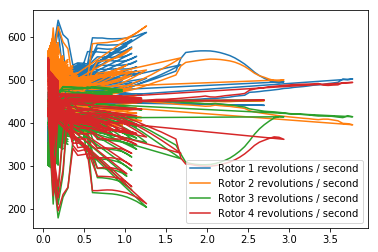

In [12]:
t1 = int(L*0)
t2 = int(L*1)
plt.plot(results['time'][t1:t2], results['rotor_speed1'][t1:t2], label='Rotor 1 revolutions / second')
plt.plot(results['time'][t1:t2], results['rotor_speed2'][t1:t2], label='Rotor 2 revolutions / second')
plt.plot(results['time'][t1:t2], results['rotor_speed3'][t1:t2], label='Rotor 3 revolutions / second')
plt.plot(results['time'][t1:t2], results['rotor_speed4'][t1:t2], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [20]:
np.mean(score_dynamics['score'][200:])

-60.64661412097971

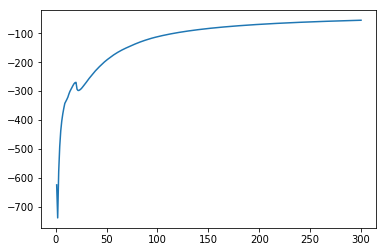

In [14]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

t1=0
t2=L

plt.plot(score_dynamics['episode'][t1:t2], score_dynamics['score'][t1:t2])
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
I consider the simplist task possible, take off vertically ascending 100 meters, from (0,0,0) to (0,0,100). I tried several reward functions. Here I list some:
1.  reward = $100 - 1.5*(Z_{tg} - Z_{cr}) - 
        1.5*\left(|X_{tg} - X_{cr}| + |Y_{tg} - Y_{cr}|\right)- 1.0*\Sigma(|A_{tg} - A_{cr}|)$
2. reward = $\frac{4*10^{6}}{1+400*(Z_{tg}-Z_{cr})^2}- 2.0*(\left(|x_{tg} - X_{cr}| + |y_{tg} - Y_{cr}|\right))$

3. reward = $\frac{2*10^{4}}{1+100*(Z_{tg}-Z_{cr})^2)}-\ln\left(1+X_{cr}^2+Y_{cr}^2\right) - \ln \left(1+\phi_{cr}^2 + \theta_{cr}^2 + \psi_{cr}^2\right) - 0.5*\ln \left(\dot{X}_{cr}^2 + \dot{Y}_{cr}^2 \right) - 0.8 * \ln \left(1+\dot{\phi}_{cr}^2 + \dot{\theta}_{cr}^2 +\dot{\psi}_{cr}^2 \right)$
               
In the above the subscript $tg$ refers to target, the subsscript $cr$ refers to current and the variable $A$ refers to the Euler angles. I use dot notation to refer to velocities, e.g. $\dot{X}$ is the velocity in the x-direction. 

The first reward function penalized any deviation from the target. The second reward function gave positive reward for the z-component getting closer to the target, but penalized the other two variables for not getting closer to the target. 

The motive behind moving from first to the second reward function is one that will give some positive reward. The problem that I continued to face is that the x and y-components always vary wildly compared to the z-component. So I wished to give only positive feed back to getting to the target. Therefore I added restrictions on the angles as well as the velocities for all the variables expcet $z$. 

I clipped reward three restricting it to the interval $[-10, 10]$.

After submitting the project I tried the several variations of the following rewward function:

`reward` = $\displaystyle
1 - 0.2* \frac{2}{1+40 d^2}+0.1*\frac{1}{50+20\dot{Z}} $ where $d$ is the square distance of current position to target position

Here I clip reward to the interval $[-1,1]$. 

`reward` is then updated as follows:

IF  $|\dot{X}| + |\dot{Y} | > 0.4$ THEN
     `reward` = `reward` - 5
     
IF sum of absolute values of angular velocities > 0.3 THEN
    `reward` = ` reward` - 2
    
IF sqrt of d < 5  THEN
    `reward` = `reward` - 100

       


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
Initially I used a deep-Q learning with implimetation similar to [Keon](https://keon.io/deep-q-learning) but quickly realized that for this task, the actor-critic algorithm is more appropriate since the action space is continuous. I used DDPG agent and all related classes defined within it and provided along with this project. 

The provided implimentation of Actor-Critic algorithm, as well as the Deep Deterministic Policy Gradient (DDPG) agent implimenation follows the paper by Lillicrap et. al. on [continous control using DDPG](https://arxiv.org/abs/1509.02971). The actor part focuses on updating the policy while the critic updates the value-function. In the DDPG algorithm we use four deep learning tracks two for the actor that learns the policy (producing the action for a given state) and two for the value-function (giving the expected reward given an action when in a given state following a current policy). The two tracks for the actor and other two for the critic allow using seperate weights one for training and the other for applying the resulting model to update the policy.

Just as the provided code follows most of structure impied by the DDPG paper, I tired to follow or at least or  try the hyperparameters and deep network structure the authors detailed in the paper. 

Several hyperparameters come into place here: $\gamma$ for discounted return I used 0.99, I tried less and found that the reward per episode is reduced. I also set the soft update parameter $\tau$ to be 0.01. I tried 0.1 and 0.001, also the effect is reduced reward. In general I tried to implement the same hyperparameters in the continuous control DDPG paper. So for the optimization learning rate, I used 0.001 (default value) in the Critic part and 0.0001 in the Actro part. I tweeked with the noise $\theta$ and $\sigma$ of the Orstein-Uhlenbech noise, I settled with $\theta = 0.15$ and $\sigma = 0.25$, I tried various values to see if they had significant effect on getting the required behavior. 

I should mention that all my trials where done before I settled on the third reward described above. However, I re-tested $\gamma = 0.005$ and $\sigma = 0.2$ with the third reward, and found that the best values where $\gamma = 0.01$ and $\sigma = 0.25$   

Regarding the neural network architecture, I tried to apply what was mentioned in the paper, initially using the same number of nodes per layer but then reduced them to current ones 256 for the first and 128 for the second. I used $l^2$ regularizers along with activation `relu` the Rectified Linear Units in the hidden layers. I used `BatchNormalization` before applying the activation when possible. For the Actor neural network I used the `sigmoid` which is then rescaled to match the given action range. 

For setting the neural network nodes for the hidden layer, the continuous control paper mentions 400/300 nodes per layer. I tried these when I applied the agent in the Pendulum and MountainCar-continuous version cases. However, when I went back to the quadcopter it did not "feel" right based on quadcopter behavior and rewards. So I tired the current nodes as described above and found better results. 

For the Critic network I used as described in the paper two hidden layers for the states (with 256 nodes for the first hidden layer and 128 for the second hidden layer) and one hidden layer for the action with 128 nodes, which are then merged into one layer followed by the output layer. I used activation `relu` for all hidden layers and linear (default) activation for the output. I usd `BatchNormalization` before activation as well as $l^2$ regularization with weight 0.01 as described in the paper. I applied the regularization with the activation. 

I appreciate that Udacity provided the code for the actor critic using Keras, the action gradient part in particular implementation is very tricky, it took me quite some time to make sense of it. Keras documentation is not helpful in showing how to use the backend functions in such scenarios. 



**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

I chose a simple task: taking off. However, it turns out to be a hard task to learn. There appear there is considerable spinning or whobling of the quadcopter as it ascends vertically. It did not ascend high enough. I repeated training several times. The result of each run is different. In all cases learning leads to chaotic rotors speed, angle values and velocities. The learning is not satifactory from my perspective. For the last run, the rewards average for the last 10 episodes is -13.519. The maximum reward is 10. 

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The begining is always hard. In this project we are dealing with continous action space that I did not encounter before and so my expectations where not clear. 

I spent considerable time studing the code and looking back at the other cases with discrete action space and state space. The part of the code that was not obvious is the Actor-Critic algorithm where the policy is updated using gradients of the state-action value function with respect to the action and understanding how Keras backend function should work. 

Here are few things that stopped me:

- There is a compile statement for the critic network but not for the actor network. 
- One can use the model to predict just after defining the neural network. 
- How does the loss function in the actor network `loss = K.mean(-action_gradients * actions)` relate to equation (6) in the [continous control using DDPG](https://arxiv.org/abs/1509.02971) paper? Corrent me if I am wrong, now I understand that the optimiser takes care of the gradient with respect to the weights while we needed to define the gradient of Q with respect to the action using the `K.gradients` function. 
 

Figuring a good set of hyperparameters for the network also took time. I tested the agent on the __Mountain Car-continuous__ version, and the __Pendulum__ since I do not have to provide a reward function to either. This was helpful to see how the agent worked in these two continuous control examples. 

The quadcopter is hard to train for this supposedly simple task. I certainly would like to try other tasks such as the pitch, roll and yaw. Setting up the reward funcion of each, is not very hard if one understands which variables are supposed to stay fixed with should vary. It would be interesting to compare the agent behavior in these tasks.  